# Demonstration Note

<p><a name="sections"></a></p>

## Sections
<a href="#classification">Classification</a><br>
    a. <a href="#Motivation">Motivation</a><br>
    b. <a href="#knn">K-Nearest Neighbor</a><br>
    c. <a href="#DiscreminantAnalysis">Discreminant Analysis</a><br>
    d. <a href="#perceptron">Perceptron</a><br>
    e. <a href="#NaiveBayes">Naive Bayes</a><br> 
    f. <a href="#logit">Logistic Regression</a><br> 
    g. <a href="regularization">Regularization</a><br>
    h. <a href="gridsearch">Grid Search</a><br>

<p><a name="classification"></a></p>

## 1. Classification

<p><a name="classification"></a></p>

### 1a. Motivation

- Categorical (qualitative) variables: takes values in a finite set (usually unordered).

  - email: {spam, non-spam}
  - blood type: {A, B, AB, O}
  - tumor: {malignant, benign}

- Classification: given a feature (or a set of features), we want to predict categorical outputs.

- Sometime people are also interested in estimating the probabilities that X belongs to each category.

**A Classification Example**

- We want to predict whether a tumor is maligant or benign based on the size

- The output is binary: 
  - 0: benign
  - 1: malignant

- Here is a simulated data set:

In [1]:
"""
Load tumor dataset
"""
from __future__ import print_function
import pandas as pd
# give the path to the file 
path_to_file = "tumor.csv"
data = pd.read_csv(path_to_file)
print(data.shape)
data.head()

(12, 2)


,Size,Malignant
0,3.788628,0
1,2.436510,0
2,2.096497,0
3,0.136507,0
4,1.722612,0


In [2]:
"""
Visualization the tumor dataset
"""
import numpy as np
import matplotlib.pyplot as plt

## function to make a 1d plot
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, \
                   rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
## feature x_tm and output x_tm
x_tm = data[["Size"]]
y_tm = data["Malignant"]
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
            xlabel="Size", ylabel="Malignant?", \
            labels=["No", "Yes"], \
            title="Tumor Size and Malignancy")
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

<Figure size 1000x600 with 1 Axes>

**Can we use Linear Regression?**

- Let's fit a linear regression model with the simulated tumor data and visualize your fitted line with the data points.

In [3]:
"""
Fit a linear model.
"""
from sklearn import linear_model
lm_1 = linear_model.LinearRegression()
## Fit a linear model
lm_1.fit(x_tm, y_tm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

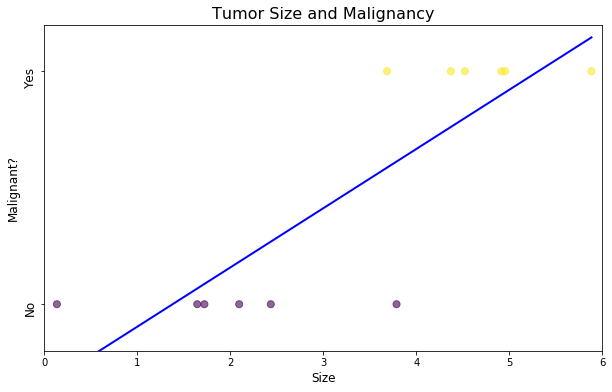

In [4]:
"""
Plot the fitted line.
"""
def linear_model_1Dplot(x, model, threshold=False, c="b"):
    ## set x range
    x = np.array(x)
    num = 10000
    x = np.linspace(start=min(x), stop=max(x), num=num).reshape(num, 1)
    ## plot regression line
    ## plot prediction if threshold is given
    if threshold:
        plt.plot(x, \
         [0 if i < threshold else 1 for i in model.predict(x)],
         lw=2, c=c)
        plt.plot(x, model.predict(x), lw=2, c=c, ls='--')
    else:
        plt.plot(x, model.predict(x), lw=2, c=c)
        
## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot the linear model
linear_model_1Dplot(x_tm, lm_1)
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

- We may then set a threshold:
  - Predict 1 if $\hat{y}\ge0.5$.
  - Predict 0 if $\hat{y}<0.5$.
- The predicted values become binary:

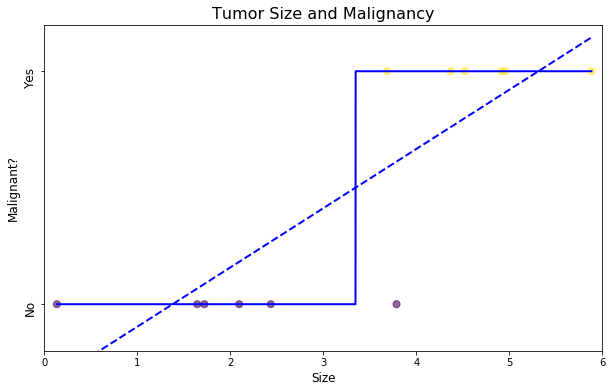

In [5]:
"""
Set prediction threshold.
"""
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot the linear model with prediction line
linear_model_1Dplot(x_tm, lm_1, threshold=.5)
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

**Issues with Linear Regression:**

- At first sight it looks like the result of the binary prediction with linear regression is not so bad. However, we do have the following two problems:

 - the continuous output exceeds the interval [0, 1]. Therefore we cannot interpret it as probability.
 - the prediction can be affected by outliers easily. 

We illustrate how the outliers - data points which are distant from the trend followed by the other observations - affect the model.

- We add two outliers to the original data set to form a new data set $x\_tm2$.

- Fit another linear regression model lm_2 (do not overwrite the previous one) with the simulated tumor data.

In [6]:
## Make a copy of the data set and et two outliers
x_tm2 = np.copy(x_tm)
x_tm2[-3, 0] = 13
x_tm2[-1, 0] = 14
## Fit a new linear model
lm_2 = linear_model.LinearRegression()
lm_2.fit(x_tm2, y_tm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Visualize the two linear models, lm_1 and lm_2 on the same graph.

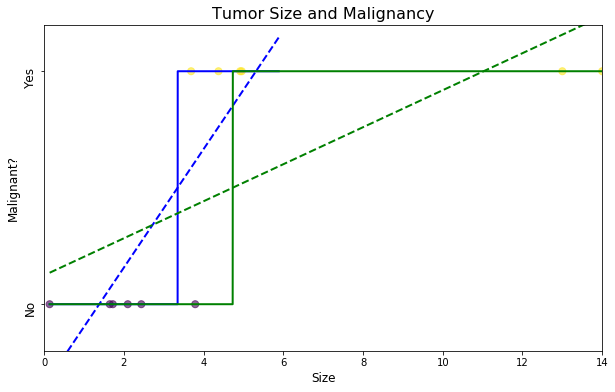

In [7]:
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm2, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot original linear model
linear_model_1Dplot(x_tm, lm_1, threshold=.5)
## Plot new linear model
linear_model_1Dplot(x_tm2, lm_2, threshold=.5, c='g')
## Set plot range
plt.axis([0,14,-.2,1.2])
plt.show()

<p><a name="knn"></a></p>

## 1b K-Nearest Neighbor

KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.

- Assumption: Similar inputs have similar ouputs
- Classification rule: for a test input $\vec{x}$, assigns the **most common label** amonst its $k$ most similar training inputs. 
- Definition of k-NN:
    - test point: $\vec{x}$
    - Let's say there are $k$ nearest neighbors of $\vec{x}$ as $S_x$ that is $S_x\subseteq D$ such that $||S_x||=k$ and $\forall(\vec{x}',y')\in D$, so every point in $D$ but not in $S_x$ is at least as far away from $\vec{x}$ as the furthest point in $S_x$:
    $$\text{dist}(\vec{x},\vec{x}')\ge \max_{\vec{x}'',y''\in S_x} \text{disk}(\vec{x},\vec{x}'')$$
- Model: The classifier $h(\cdot)$ returns the most common label in $S_x$:
$$h(\vec{x})=\text{mode}({y'':(\vec{x}'',y'')\in S_x})$$
- Distance metric: The better the metric reflects the label similarity, the better the classified will be. The most common choice is the **Minkowski distance**:
$$\text{dist}(\vec{x},\vec{z})=\Big(\sum_{i=1}^N||x_i-z_i||^p\Big)^{1/p}$$

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
knn=KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:, pair]
iris_y = iris.target

In [11]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(iris_x,iris_y)
y_pred=knn.predict(iris_x)
print(metrics.accuracy_score(iris_y,y_pred))

0.9733333333333334


In [12]:
def data_2Dplot(x, y, legends=None, xlabel=None, ylabel=None):
    x, y = np.array(x), np.array(y)
    if legends is None:
        legends = np.unique(y)
    col = ["r", "g", "b", "m", "c", "k"]
    ## plot the data points
    for i in np.unique(y):
        plt.scatter(x[y==i,0], x[y==i,1], c=col[i%6], s=25, label=legends[i])
    
    if xlabel:
        plt.xlabel(xlabel,size=12)
    if ylabel:
        plt.ylabel(ylabel,size=12)
    plt.legend(loc=2)
    del_0, del_1 = (max(x[:,0]) - min(x[:,0]))*.1, (max(x[:,1]) - min(x[:,1]))*.1
    plt.axis([
        min(x[:,0]) - del_0, max(x[:,0]) + del_0,
        min(x[:,1]) - del_1, max(x[:,1]) + del_1]
    )
    
def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

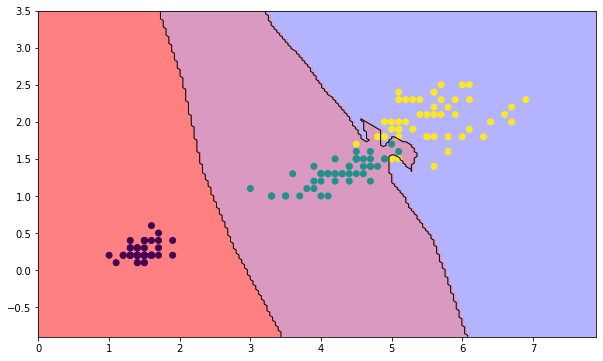

In [13]:
plt.figure(figsize=(10, 6))
plot_model(knn, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

In [14]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [15]:
knn.fit(iris_x,iris_y)
y_pred=knn.predict(iris_x)
metrics.accuracy_score(iris_y,y_pred)

0.9666666666666667

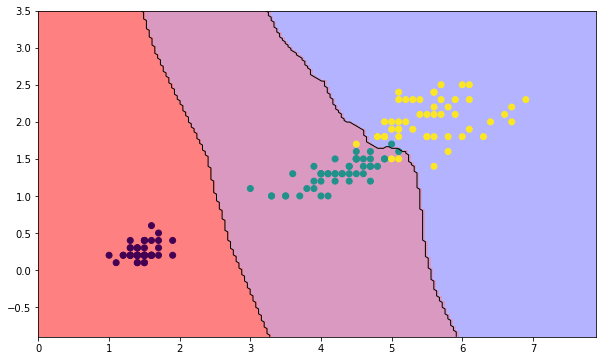

In [16]:
plt.figure(figsize=(10, 6))
plot_model(knn, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

#### Curse of Dimensionality
<img src="img/curse_dimensionality.png" width=500 length=700 />
Unfortunately, points tend to be less close together in higher dimensional space. As the dimension gets larger, the probability of nearby neigheighobors being similar becomes lesser and the assumption of k-NN breaks. 

<p><a name="DiscreminantAnalysis"></a></p>

### 1b. Discreminant Analysis

#### Concept of Conditional Probability
**The Concept of Conditional Probability**

Let $Y$ be an event with probability $P(Y) > 0$, the conditional probability of observing $X$ given that $Y$ has occurred is defined as:

$$
P(X|Y) = \frac{P(X,Y)}{P(Y)}
$$

- $P(X,Y)$ refers to the joint probability of observing both the event $X$ and event $Y$. 
- $P(X|Y)$ is the probability of event $X$ after insuring event $Y$'s occurrence.

**Example**: Suppose that we are given a random number uniformly distributed across 0 to 1. How do we compute the probability of the number falling into the blue region (plotted in the output of the next code block)?

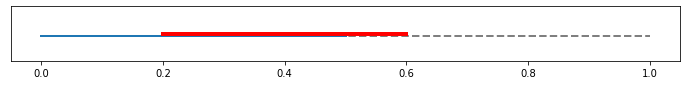

In [17]:
fig = plt.figure(figsize=(12, 1))
plt.plot([0, 1],[-0.01, -0.01], color='k', ls='--', linewidth=2, alpha=0.5)
plt.plot([0, 0.5],[-0.01, -0.01], linewidth=2, alpha=1)
plt.plot([0.2, 0.6],[0, 0], color='red', linewidth=4)
plt.ylim(-0.1, 0.1)
plt.xticks()
plt.yticks([])
plt.show()

If $X$ and $Y$ are independent, $P(X, Y) = P(X)P(Y)$:

- Then the conditional probability is nothing but

$$P(X|Y) = \frac{P(X, Y)}{P(Y)} = \frac{P(X)P(Y)}{P(Y)}  = P(X)$$ 

- This implies the occurrence of $Y$ does not have any impact on the probability of the occurrence of $X$


**Conditional Probability Example**

Consider an experiment of picking balls of two colors, red and black, from two boxes labeled A and B.

- There are 10 black balls and 1 red ball in box A, and 1 black ball and 10 red balls in box B.
- We randomly choose a box (with equal chance) and then pick a ball from the chosen box.
- What is the probability that we draw a red ball?

<img src='img/balls_in_box.png'>

While choosing a box, we have:
- $P(A)=P(B)=0.5$.
- If we choose A, $P(red|A) = 1/11$. 
- if we choose B, $P(red|B) = 10/11$.

So the total probability to draw one red ball is:
$$
\begin{align}
P(red) &= P(red|A)\cdot P(A)+P(red|B)\cdot P(B)
\\
&= \frac{1}{11} \times 0.5 + \frac{10}{11} \times 0.5 
\\
&= \frac{1}{2}
\end{align}
$$

The 0.5 probability can be computed by ignoring the boxes and lump the balls together.

- There are 1+10 red balls and 10+1 blacks balls. So the chance to get a red ball is 11.0/22.0 = 0.5

- This works because the prior probabilities of choosing box A and B are the same

How does this relate to our classification problem?

Consider from the ball-picking example we realize that for a red ball,

- the probability that it's from Box A is $\frac{1}{11}$.
- the probability that it's from Box B is $\frac{10}{11}$.

Next time if we get a red ball, shouldn't we be more confident that the ball has been from box B?

#### Discriminant Analysis: Basic Theory

When we label the data set according to the classification outcome, we may hypothesize that each sub-data set is generated 
from certain type of probability distributions. 
Discriminant analysis is a statistical technique which classifies by determining the probability distributions of all classes based on the data.

- The type of probability distribution is hypothesized. But the specific distribution is pinned down by data fitting

**Motivation**

To be more precise, let's consider a simulated example, performing binary classification based on a numerical feature.

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


def multivariate_normal(mu, sigma, width = 3):
    ## generate data for 3D surface plot
    X = np.linspace(mu[0] - width*sigma[0, 0], mu[0] + width*sigma[0, 0], 300)
    Y = np.linspace(mu[1] - width*sigma[1, 1], mu[1] + width*sigma[1, 1], 300)
    X, Y = np.meshgrid(X, Y)
    s_inv = sigma.I
    Z = np.exp(-(s_inv[0,0]*(X-mu[0])**2 + s_inv[1,1]*(Y-mu[1])**2 + \
                (s_inv[0,1]+s_inv[1,0])*(X-mu[0])*(Y-mu[1]))/2)
    return X, Y, Z/(2*np.pi)/(np.linalg.det(sigma))**.5

def multivariate_normal_plot(mu, sigma, n, step, color, width=3, alpha=0.3, cmap=cm.copper, label=None):
    ## plot
    X, Y, Z = multivariate_normal(mu, sigma, width=width)
    ax.plot_surface(X, Y, Z, rstride=6, cstride=6, alpha=alpha, color=color, linewidth=0.5, label=label)
    cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=cmap, levels=np.arange(n)*step)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
def show_sample():
    np.random.seed(1)
    class_1 = stats.multivariate_normal(np.zeros([2]), np.eye(2)).rvs(50)
    class_2 = stats.multivariate_normal(np.ones([2])*3, np.array([[1, 0.5],[0.5, 1]])).rvs(53)
    fig = plt.figure(figsize=(10, 6))
    plt.scatter(class_1[:, 0], class_1[:, 1], alpha=0.7, label='class blue')
    plt.scatter(class_2[:, 0], class_2[:, 1], color='green', alpha=0.7, label='class green')
    plt.legend(loc=2)

In [19]:
#### Creating the Data

end = 30
len_0 = 70
len_1 = 70
color_0 = 'r'
color_1 = 'g'

np.random.seed(108)
x_0 = stats.gamma(9, 0.5).rvs(len_0)
x_1 = stats.norm(15, 6).rvs(len_1)
y   = np.array([color_0]*len_0 + [color_1]*len_1)  #  first len_0 of class r, the next len_1 of class g

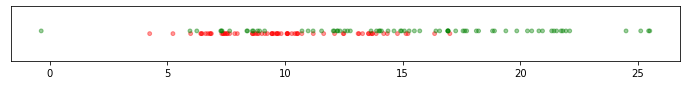

In [20]:
#### Visualize the Data

plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
scatter_kwargs = dict(color=y, s=15, alpha=0.4)
plt.scatter(x=np.concatenate([x_0, x_1]), y=[0]*len_0 + [0.01]*len_1, **scatter_kwargs)
plt.show()

If we found a new observation, which class do you think it belongs to?

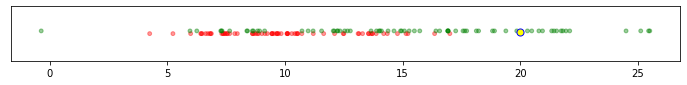

In [21]:
plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
plt.scatter(x=np.concatenate([x_0, x_1]), y=[0]*len_0 + [0.01]*len_1, **scatter_kwargs)
plt.scatter(20, 0.005, c='yellow', s=50, edgecolors='b')
plt.show()

What about the next one?

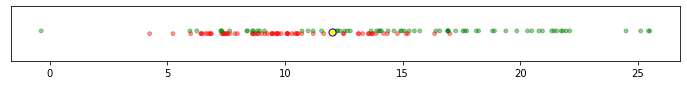

In [22]:
plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.01]*len_1, **scatter_kwargs)
plt.scatter(12, 0.005, c='yellow', s=50, edgecolors='b')
plt.show()

What makes us feel differently?

- If there is some other information tacitly guided us to the conclusion, can we somehow name it? Or visualize it?

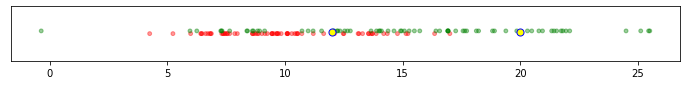

In [23]:
plt.figure(figsize=(12, 1))
plt.ylim(-0.1, .1)
plt.yticks([])
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.01]*len_1, **scatter_kwargs)
yellow_kwargs = dict(c='yellow', s=50, edgecolors='b')
plt.scatter(20, 0.005, **yellow_kwargs)
plt.scatter(12, 0.005, **yellow_kwargs)
plt.show()

How about **density plot** for each class?  The data is generated from two known probability distributions. So we can
make the exact density plots.

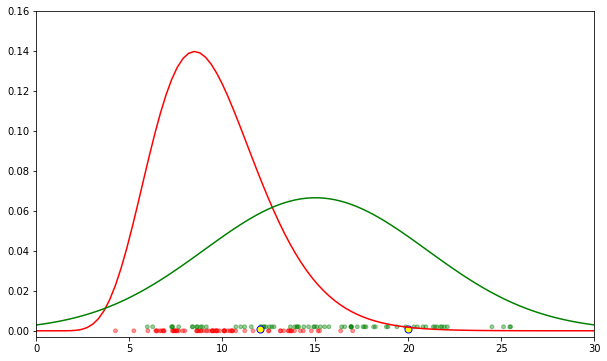

In [24]:
pdf_0 = stats.gamma(9, 0.5).pdf
pdf_1 = stats.norm(15, 6).pdf

lin_sp = np.linspace(start=0, stop=end, num=100)
plt.figure(figsize=(10, 6))
plt.plot(lin_sp, pdf_0(lin_sp), color=color_0)
plt.plot(lin_sp, pdf_1(lin_sp), color=color_1)
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)
plt.ylim(-0.003, 0.16)
plt.xlim(0, 30)
yellow_kwargs = dict(c='yellow', s=50, edgecolors='b')
plt.scatter(20, 0.001, **yellow_kwargs)
plt.scatter(12, 0.001, **yellow_kwargs)
plt.show()

What's the difference between the two observations?

- when x = 20, the red and green classes have dramatically different probability densities; but for x = 12, it is not the case!

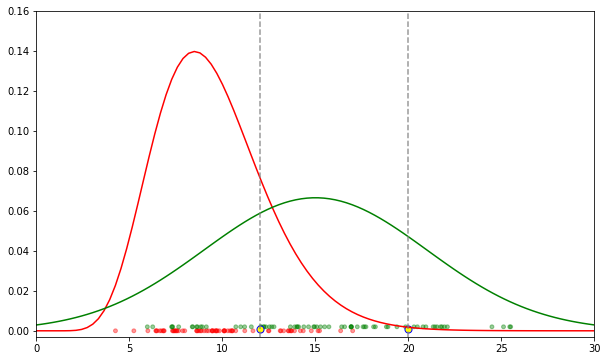

In [25]:
lin_sp = np.linspace(start=0, stop=end, num=100)
plt.figure(figsize=(10, 6))
plt.plot(lin_sp, pdf_0(lin_sp), color=color_0)
plt.plot(lin_sp, pdf_1(lin_sp), color=color_1)
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)
plt.ylim(-0.003, 0.16)
plt.xlim(0, 30)
yellow_kwargs = dict(c='yellow', s=50, edgecolors='b')
plt.scatter(20, 0.001, **yellow_kwargs)
plt.scatter(12, 0.001, **yellow_kwargs)
line_kwargs = dict(ls='--', color= 'grey', alpha=0.8)
plt.axvline(x=20, **line_kwargs)
plt.axvline(x=12, **line_kwargs)
plt.show()

Note that to perform classification, we need to compute

$$
\text{ }\\
P(Y=k \ | \ X =x ) \text{ for each class k}
$$

But we just found that

$$
\text{ }\\
p(X=x \ | \ Y=k) \text{ for each class k}
$$

is helpful! 

**How do we relate the two kinds of conditional probability?**

**Discriminant Analysis and Bayes Theorem**

Bayes theorem comes into play because we want to relate the two conditional probabilities above.

$$
P(Y=k \ | \ X=x) = \frac{p(X=x \ | \ Y=k) P(Y=k)}{\sum_{l}p(X=x \ | \ Y=l) P(Y=l)}
$$

**Questions**:

- How do we estimate $P(Y = k) \text{ (this is called the } \textbf{prior probability } \text{for class k)} \text{ ?}$
- How do we estimate $p(X=x \ | \ Y=k)\text{ ?}$

**Answers**

- The natural candidate for estimating $P(Y=k) \text{ is simply } \frac{n_k}{n}$, the fraction of observations, where
 - $n_k$ is the number of observations in class k.
 - $n$ is the total number of the observations.
- Modeling $p(X=x \ | \ Y=k)$ is nontrivial! Different models (hypotheses on the probability distributions) result in different types of classifiers as we will see.


#### Discriminant Analysis: Modeling

To build a Bayes classifier, the only thing we miss is the probability distribution of each class

$$
p(X=x \ | \ Y=k)
$$

Since this is a continuous distribution, the **Gaussian** distribution is widely used to model it. Different assumptions on Gaussian distribution result in different kind of classifiers. The following three are most common:

- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Gaussian Naive Bayes (This is the same as QDA in a one dimensional case)


#### The One Dimensional Case

When we have only one feature, we use one dimensional Gaussian distribution with a pdf 

$$
N(\mu, \sigma)(x) = \frac{1}{\sqrt{2\pi}\sigma}exp\big[{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}\big]
$$

- Notice that it is sufficient to specify the **mean** and the **standard deviation** to specify a Gaussian distribution. 

In general we allow **different means** among different classes, but we assume identical standard deviation among different LDA classes:

**LDA**

For LDA, we assume that the standard deviation is the same for each class. In one dimensional case, this means that the distribution for each class $k \text{ is}$
$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma}\big)^2}\big]
$$

With visualization, this means that the **width** of the distribution for each class remains the same.

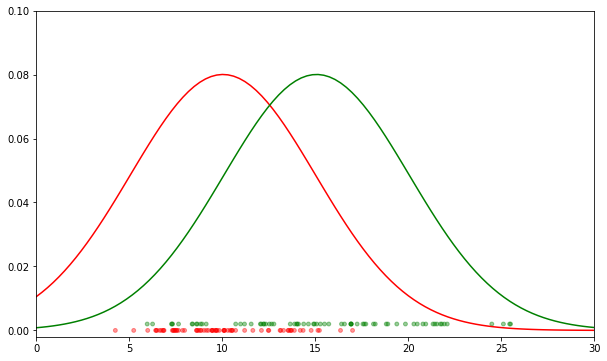

In [26]:
mu_0 = np.mean(x_0)
mu_1 = np.mean(x_1)
std = np.std( np.concatenate([x_0, x_1]) )

plt.figure(figsize=(10, 6))
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)

point = np.linspace(start=0, stop=30, num=100)
plt.plot(point, stats.norm(mu_0, std).pdf(point), color='red')
plt.plot(point, stats.norm(mu_1, std).pdf(point), color='green')


plt.xlim(0,30)
plt.ylim(-0.002, 0.1)
plt.show()

**Question** 

- Now we know that with LDA the probability distribution for each class $k \text{ is}$
$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma}\big)^2}\big]
$$
How do we decide $\mu_k \text{ and the class label independent } \sigma \text{ ?}$

**Answer**

$$
\begin{align}
\hat{\mu}_k &= \frac{1}{n_k}\sum_{i;y_i=k}x_i
\\
\hat{\sigma}^2 &= \frac{1}{n-K}\sum_{k=1}^{K}\sum_{i;y_i=k}(x_i-\hat{\mu}_k)^2
\\
&=\sum_{k=1}^{K}\frac{n_k-1}{n-K}\cdot\hat{\sigma}_k^2
\end{align}
$$

where
  - $\hat{\mu}_k$ is the sample mean of class $k$
  - $K$ is the total number of classes
  - $\hat{\sigma}_k^2=\frac{1}{n_k-1}\sum_{i;y_i=k}(x_i-\hat{\mu}_k)^2$ is the sample variance of class $k$
  - for $c_k = \frac{n_k-1}{n-K}$, we have $\sum_{k=1}^K c_k = \sum_{k=1}^K \frac{n_k-1}{n-K} = 1$
  - So the formula on $\hat{\sigma}$ is the weighted average of the various $\hat{\sigma}_k$
  
**QDA**

For QDA, the standard deviations are allowed to vary among the classes. In one dimensional case, this means the **width** of the distribution for each class can be different. Therefore:

$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma_k}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma_k}\big)^2}\big]
$$

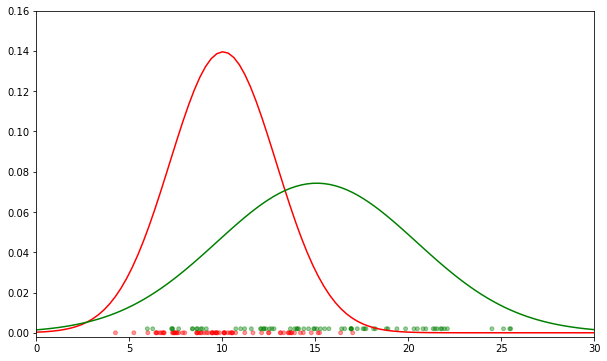

In [27]:
mu_0 = np.mean(x_0)
mu_1 = np.mean(x_1)
std_0 = np.std(x_0)
std_1 = np.std(x_1)

plt.figure(figsize=(10, 6))
plt.scatter(np.concatenate([x_0, x_1]), [0]*len_0 + [0.002]*len_1, **scatter_kwargs)

point = np.linspace(0, 30, 100)
plt.plot(point, stats.norm(mu_0, std_0).pdf(point), color='red')
plt.plot(point, stats.norm(mu_1, std_1).pdf(point), color='green')


plt.xlim(0,30)
plt.ylim(-0.002, 0.16)
plt.show()

**Question** 

- Now we know that with QDA the distribution for each class $k \text{ is}$
$$
p(X=x \ | \ Y=k) = \frac{1}{\sqrt{2\pi}\sigma_k}exp\big[{-\frac{1}{2}\big(\frac{x-\mu_k}{\sigma_k}\big)^2}\big]
$$
How do we estimate $\hat{\mu}_k$ and $\hat{\sigma}_k$?

#### Higher Dimensional Cases

We start with the discussion on higher dimensional Gaussian distribution. This is essentially the only difference in higher dimensional discriminant analysis.

##### Higher Dimensional Gaussian Distribution

We still need only "two" parameters to specify higher dimensional Gaussian distribution: the **mean** and the **covariance**. However, for a p dimensional case (with p features),
- the mean is a p-dimensional vector
- the covariance is a $p \times p$ symmetric matrix

The probability density function becomes:
$$
N(\mu, \Sigma)(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}\big]
$$


**Mean**

The mean still decides where the "bell" is centered at.

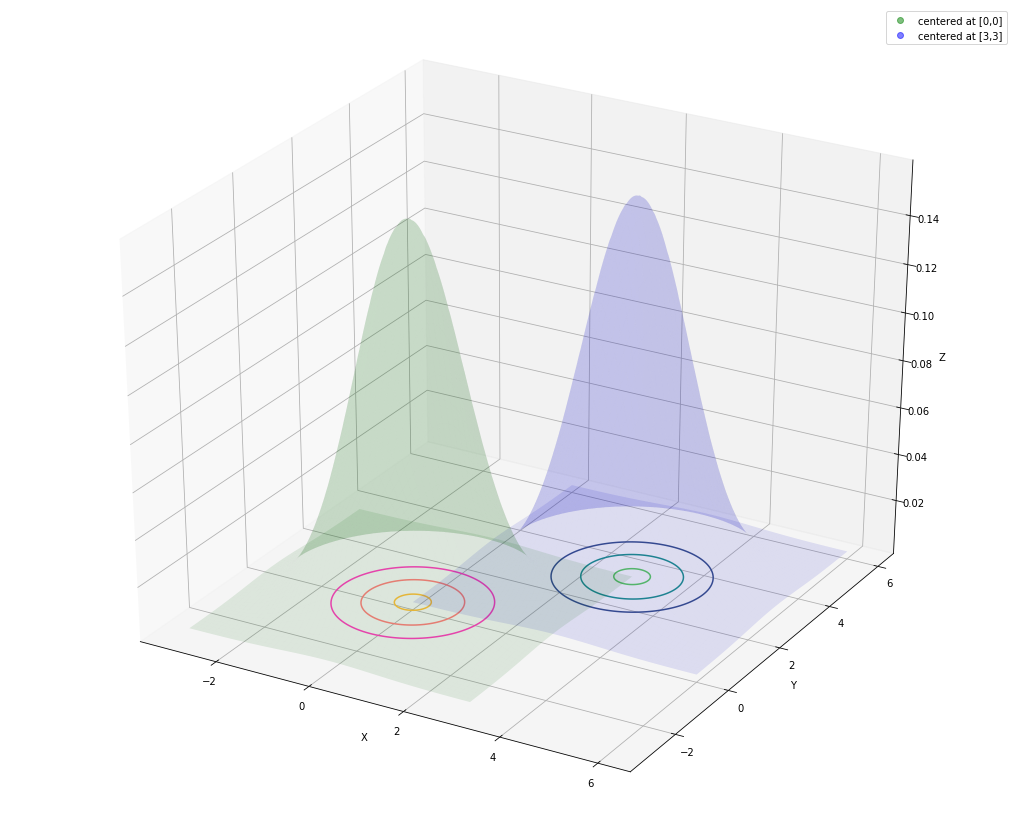

In [28]:
mu_1 = np.array([0,0])
mu_2 = np.array([3,3])
sigma = np.matrix([[1, 0], [0, 1]])

fig = plt.figure(figsize=(18, 15))
ax = fig.gca(projection='3d')
multivariate_normal_plot(mu_1, sigma, n=5, step=0.05, color='green', alpha=0.1, cmap=cm.spring)
multivariate_normal_plot(mu_2, sigma, n=5, step=0.05, color='blue', alpha=0.1, cmap=cm.viridis)

# Legend
legend_kwargs = dict(linestyle='none', alpha=0.5, marker='o')
fake2Dline1 = mpl.lines.Line2D([0], [0], c='green', **legend_kwargs)
fake2Dline2 = mpl.lines.Line2D([0], [0], c='blue', **legend_kwargs)
ax.legend([fake2Dline1, fake2Dline2], ['centered at [0,0]', 'centered at [3,3]'], numpoints=1)

plt.show()

**Covariance Matrix**

The covariance matrix is a $p \times p \text{ matrix.}$ The covariance matrix, one of whose special cases is the square of standard deviation in one dimensional space, decides the **shape** of the "bell". However, the shape means more than just the width in a higher dimensional space.

**Width**

Let's compare two Gaussian distributions with different covariance matrices in a two dimensional space.

$
\Sigma_1 = 
\begin{bmatrix}
1 & 0 
\\[0.3em]
0 & 1
\end{bmatrix}
\text{ and } \ 
\Sigma_2 = 
\begin{bmatrix}
2 & 0 
\\[0.3em]
0 & 2
\end{bmatrix}
$

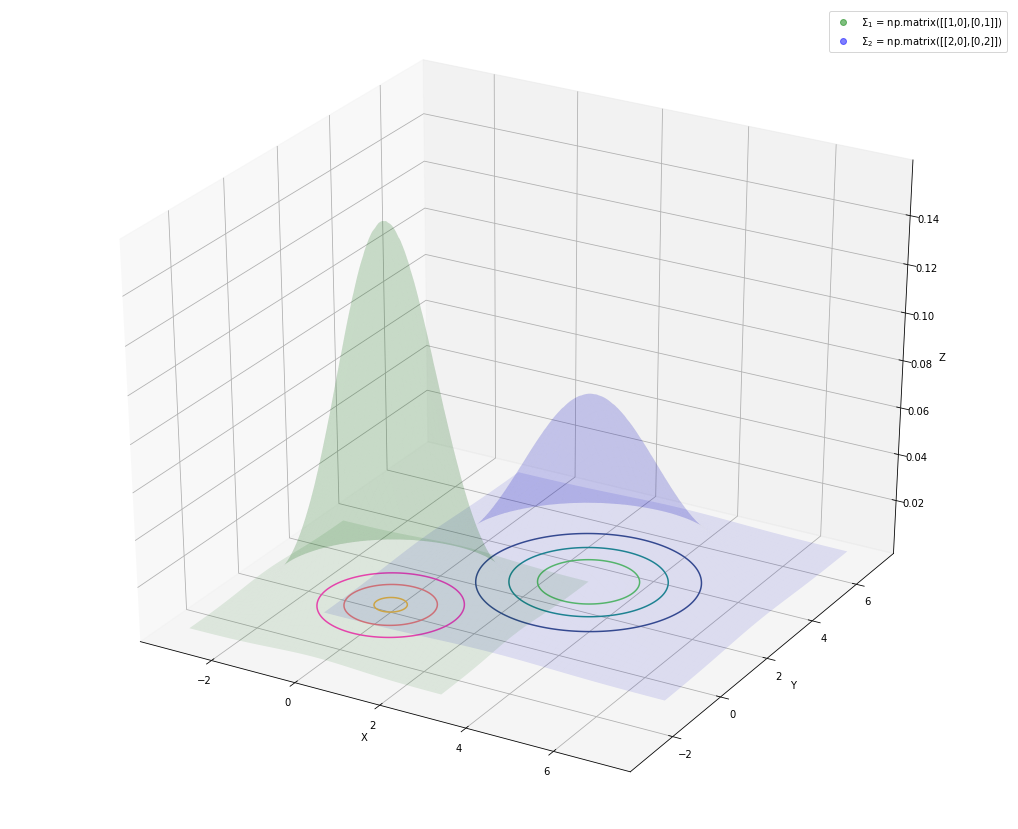

In [29]:
mu_1 = np.array([0,0])
mu_2 = np.array([3,3])
sigma_1 = np.matrix([[1, 0], [0, 1]])
sigma_2 = np.matrix([[2, 0], [0, 2]])

fig = plt.figure(figsize=(18, 15))
ax = fig.gca(projection='3d')
multivariate_normal_plot(mu_1, sigma_1, n=5, step=0.05, color='green', alpha=0.1, cmap=cm.spring)
multivariate_normal_plot(mu_2, sigma_2, n=5, step=0.02, width= 2, color='blue', alpha=0.1, cmap=cm.viridis)

# Legend
legend_kwargs = dict(linestyle='none', alpha=0.5, marker='o')
fake2Dline1 = mpl.lines.Line2D([0], [0], c='green', **legend_kwargs)
fake2Dline2 = mpl.lines.Line2D([0], [0], c='blue', **legend_kwargs)
label = ['$\Sigma_1$ = np.matrix([[1,0],[0,1]])', '$\Sigma_2$ = np.matrix([[2,0],[0,2]])']
ax.legend([fake2Dline1, fake2Dline2], label, numpoints=1)

plt.show()

#### Models in Higher Dimension

Recall what we have learned so far:

- The purpose is to classify based on numerical features, so we want to compute the probability of being in class $k \text{ under the condition that } X=x: \ P(Y=k \ | \ X=x)$

- By Bayes theorem we can re-express the conditional probability as below:
$$
P(Y=k \ | \ X=x) = \frac{p(X=x \ | \ Y=k) P(Y=k)}{\sum_{l}p(X=x \ | \ Y=l) P(Y=l)}
$$
so we only need to decide:
    - prior probability
    - the probability distribution of the feature in each class
    
- While estimating the **prior** is easy; estimating the distribution in each class is often hard

**The Assumptions on the Discriminatic Models in  Higher Dimension**

To estimate the distribution in each class, we need to make some additional assumptions. The ones below are shared by **LDA**, **QDA** and **GNB**:

- The distribution in each class is Gaussian (i.e. normal).
- Each Gaussian distribution centers at a possibly different position. (How do we find the centers?)

It is the different assumptions on the **covariant matrix** which differentiate these three models:

- LDA assumes every class has the **same covariance shape**; LDA allows **correlation** (off-diagonal entries).
- QDA allow **different covariance shape** for each class; QDA allows **correlation** (off-diagonal entries).
- GNB allow **different covariance shape** for each class; GNB requires **uncorrelated** features (diagonal covariance).

To illustrate the differences, let's consider the two-dimensional sample below:

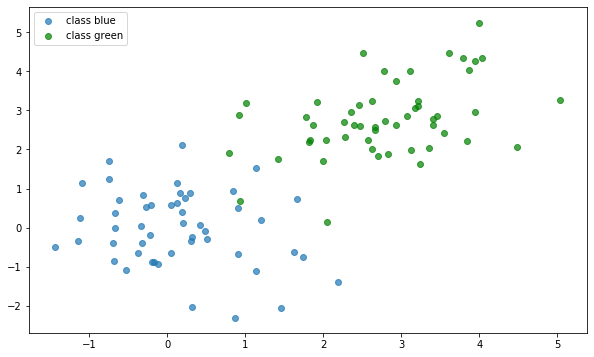

In [30]:
show_sample()
plt.show()

**QDA** 

We start with QDA. For this particular example, we need to compute the blue class conditional probability density:

$$
p(X=x \ | \ Y=b) = \frac{1}{(2\pi)|\Sigma_b|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_b)^T\Sigma_b^{-1}(x-\mu_b)}\big]
$$

and the green class conditional probability density,

$$
p(X=x \ | \ Y=g) = \frac{1}{(2\pi)|\Sigma_g|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_g)^T\Sigma_g^{-1}(x-\mu_g)}\big]
$$

- How do we estimate $\mu_b \text{, } \mu_g \text{, } \Sigma_b \text{ and } \Sigma_g \text{?}$

The training data we have is:
$$
\text{class blue } = 
\begin{bmatrix}
(x^b_1, y^b_1)\\
(x^b_2, y^b_2)\\
\vdots \\
(x^b_{50}, y^b_{50})\\
\end{bmatrix}
\quad \text{ and } \quad
\text{class green}=
\begin{bmatrix}
(x^g_1, y^g_1)\\
(x^g_2, y^g_2)\\
\vdots \\
(x^g_{53}, y^g_{53})\\
\end{bmatrix}
$$

**Questions**
- How do we compute $\hat{\mu}_b$ and $\hat{\mu}_g$?
- The covariance matrices are given by:
$$
\hat{\Sigma}_b =
\begin{bmatrix}
V_x^b & cov^b_{x, y} 
\\[0.3em]
cov^b_{y, x} & V^b_y
\end{bmatrix}
$$
What do the parameters mean? How do we compute these parameters?
- What about
$$
\hat{\Sigma}_g =
\begin{bmatrix}
V_x^g & cov^g_{x, y} 
\\[0.3em]
cov^g_{y, x} & V^g_y
\end{bmatrix}
$$

**LDA**

We need to compute, for each $k:$ 
$$
p(X=x \ | \ Y=k) = \frac{1}{(2\pi)|\Sigma|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_k)^T\Sigma^{-1}(x-\mu_k)}\big]
$$

**Estimation**
- We compute $\hat{\mu}_b \text{ and } \hat{\mu}_g$ in the same way as before
- We have

$$
\quad\\
\hat{\Sigma} 
=\sum_{k\in \{b, g\}}\frac{n_k-1}{n-K}\cdot\hat{\Sigma}_k
$$

**GNB**

While the mean can be estimated in the same way, we need to estimate the covariance matrix for each $k:$ 
$$
\quad \\
p(X=x \ | \ Y=k) = \frac{1}{(2\pi)|\Sigma_k|^{1/2}}exp\big[{-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}\big]
$$

- We still have
$$
\Sigma_b =
\begin{bmatrix}
V_x^b & cov^b_{x, y} 
\\[0.3em]
cov^b_{y, x} & V^b_y
\end{bmatrix}
$$
and
$$
\Sigma_g =
\begin{bmatrix}
V_x^g & cov^g_{x, y} 
\\[0.3em]
cov^g_{y, x} & V^g_y
\end{bmatrix}
$$

**Questions**

- What's the difference (simplification) from QDA?

**Answer**

- GNB assumes
$$
\Sigma_b =
\begin{bmatrix}
V_x^b & 0 
\\[0.3em]
0 & V^b_y
\end{bmatrix}
$$
and
$$
\Sigma_g =
\begin{bmatrix}
V_x^g & 0 
\\[0.3em]
0 & V^g_y
\end{bmatrix}
$$

Recall that GNB stands for **Gaussian Naive Bayes** classifier. The name indicates a Bayes classifier with Gaussian distribution. The assumption of Gaussian distribution, together with **mutually independent** features, implies that the features are uncorrelated. This is what the adjective **Naive** stands for.

In [31]:
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
def lda_1Dplot(x, model):
    x = np.array(x)
    num = 10000
    x = np.linspace(start=min(x), stop=max(x), num=num).reshape(num,1)
    plt.plot(x, model.predict(x), lw=2)
    for i in range(len(LDA.predict_proba(x)[0])):
        plt.plot(x, model.predict_proba(x)[:,i], ls='--', lw=2)

def plotModel(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import matplotlib.pyplot as pl
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters ans true labels
    plt.scatter(x, y, c = label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

We demonstrate **LDA** in `sklearn` with the tumor data.

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:, pair]
iris_y = iris.target

- Build the LDA model on the tumor data

In [33]:
from sklearn import discriminant_analysis

LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(iris.data, iris.target)
LDA.score(iris.data, iris.target)

0.98

In [34]:
def data_2Dplot(x, y, legends=None, xlabel=None, ylabel=None):
    x, y = np.array(x), np.array(y)
    if legends is None:
        legends = np.unique(y)
    col = ["r", "g", "b", "m", "c", "k"]
    ## plot the data points
    for i in np.unique(y):
        plt.scatter(x[y==i,0], x[y==i,1], c=col[i%6], s=25, label=legends[i])
    
    if xlabel:
        plt.xlabel(xlabel,size=12)
    if ylabel:
        plt.ylabel(ylabel,size=12)
    plt.legend(loc=2)
    del_0, del_1 = (max(x[:,0]) - min(x[:,0]))*.1, (max(x[:,1]) - min(x[:,1]))*.1
    plt.axis([
        min(x[:,0]) - del_0, max(x[:,0]) + del_0,
        min(x[:,1]) - del_1, max(x[:,1]) + del_1]
    )
    
def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    '''
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    colDict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', colDict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

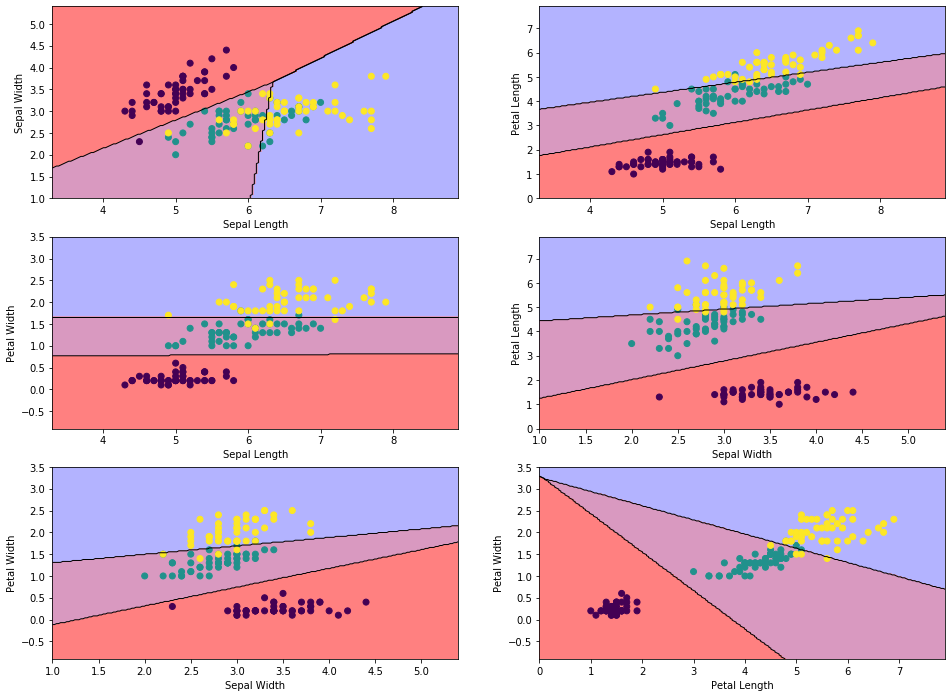

In [35]:
plt.rcParams['figure.figsize'] = 16, 12
labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width" ]
import warnings
warnings.filterwarnings('ignore')
def pairPlot(model, i, j):
    model.fit(iris.data[:, [i, j]], iris.target)
    plot_model(model, iris.data[:, i], iris.data[:, j], iris.target)
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])
    
plt.subplot(321)
pairPlot(LDA, 0, 1)

plt.subplot(322)
pairPlot(LDA, 0, 2)

plt.subplot(323)
pairPlot(LDA, 0, 3)

plt.subplot(324)
pairPlot(LDA, 1, 2)

plt.subplot(325)
pairPlot(LDA, 1, 3)

plt.subplot(326)
pairPlot(LDA, 2, 3)

plt.show()

We demonstrate **QDA** in `sklearn` with the tumor data.

In [36]:
QDA = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA.fit(iris.data, iris.target)
QDA.score(iris.data, iris.target)

0.98

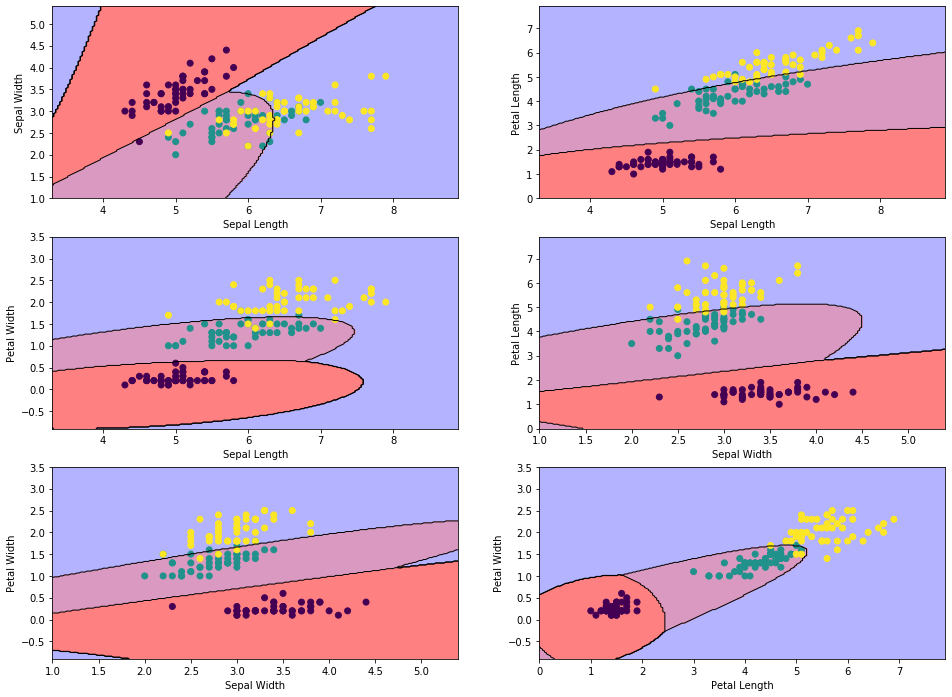

In [37]:
plt.rcParams['figure.figsize'] = 16, 12
plt.subplot(321)
pairPlot(QDA, 0, 1)

plt.subplot(322)
pairPlot(QDA, 0, 2)

plt.subplot(323)
pairPlot(QDA, 0, 3)

plt.subplot(324)
pairPlot(QDA, 1, 2)

plt.subplot(325)
pairPlot(QDA, 1, 3)

plt.subplot(326)
pairPlot(QDA, 2, 3)

plt.show()

<p><a name="perceptron"></a></p>

### 1c. Perceptron
Perceptron is a binary classifier that classifies based on the unit step function
$$\phi(z)=
\begin{cases}
1 \quad&  \text {if}\ z\ge 0\\
-1 & \text {otherwise}\\
\end{cases}
$$

#### The perceptron learning rule
A perceptron learning rule is simple that as it is a binary classifier, the weight gets updated as the prediction gets misclassified. 

The weight vector can be written as $w_j = w_j+\Delta w_j$ where $\Delta w_j$ is used to update the weight $w_j$ and is calculated by the perceptron learning rule:

$$ \Delta w_j=\eta(y_i-{\hat y}_i)x_j$$

$y_i$ is the true class label, ${\hat y}_i$ is the predicted class label, and $\eta$ is the learning rate that is between 0.0 and 1.0. 

We are going to observe how `Perceptron` works using `iris` data. We can use `Perceptron` via `sklearn`. 
The important parameters are:

- *Penalty*: The penalty is also known as regularization. The default set is `none`. Choicees are **l2** (Ridge), **l1** (Lasso), and **elasticnet**. See the later part in this document for regularization. 
- *alpha*: is the constant parameter that is multiplied to the regularizer. This is denoted with $\lambda$ in the lecture note. 
- *max_iter*: the maximum number of passes over the training data (a.k.a. epochs). 
- *eta0*: A constant by which the updates are multiplied. 
- For more information, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">check here</a>

In [38]:
from sklearn import datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()

In [39]:
# Select predictors and target. 
# Split into 70% and 30%. 
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Here, we are going to test how the learning rate $\eta$, `random_state`, and `max_iter` parameters affect the classification rate. 

- $\eta=0.80$, `max_iter`$=1000$, and `random_state`$=1$. 
- $\eta=0.01$, `max_iter`$=1000$, and `random_state`$=1$.
- $\eta=0.01$, `max_iter`$=3$, and `random_state`$=1$.
- $\eta=0.01$, `max_iter`$=3$, and `random_state`$=0$.

In each test, we are going to observe the accuracy rate, the number of misclassification, and the number of iterations made which also can be understood as the number of updates on weight $w$. 

In [40]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
ppn = Perceptron(eta0=0.8, random_state=1,max_iter=1000)

In [43]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.8,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
y_pred = ppn.predict(X_test_std)

In [45]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test!=y_pred).sum())
print('Number of iteration:', ppn.n_iter_)

Accuracy: 0.91
Misclassified samples: 4
Number of iteration: 11


In [46]:
ppn = Perceptron(eta0=0.01, random_state=1,max_iter=1000)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test!=y_pred).sum())
print('Number of iteration:', ppn.n_iter_)

Accuracy: 0.93
Misclassified samples: 3
Number of iteration: 7


In [47]:
ppn = Perceptron(eta0=0.01, random_state=1,max_iter=3)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test!=y_pred).sum())
print('Number of iteration:', ppn.n_iter_)

Accuracy: 0.91
Misclassified samples: 4
Number of iteration: 3


In [48]:
ppn = Perceptron(eta0=0.01, random_state=0,max_iter=30)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test!=y_pred).sum())
print('Number of iteration:', ppn.n_iter_)

Accuracy: 0.87
Misclassified samples: 6
Number of iteration: 6


<p><a name="NaiveBayes"></a></p>

## 1d Naive Bayes

Recall that the Bayes theorem assert, given $X=x$, that the probability the output being in class $k$ can be estimated by:

$$
Pr(Y=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l}f_l(x)\pi_l},
$$

$\pi_l = P(Y=k)$, and $f_k(x) = P(x|Y=k)$

LDA and QDA use multivariate Gaussian densities (but with different assumptions on their covariance matrices). These do not work well when the number of features is large.

Naive Bayes models assume that the different features are conditionally independent in each class so can work with dataset of large number of features.

The *naive Bayes classifier* is based on Bayes theorem with the additional independence assumptions between predictors.

The assumption of conditional independence requires the class $k$ probability density to factorize:

$$
f_k(x) = \prod_{j=1}^{p}f_{jk}(x)
$$
where $f_{jk}(x)$ is the probability density for the *j*th feature $X_j$ in class $k$.

We will introduce two kinds of Naive Bayesian models:
- *Gaussian Naive Bayes*
- *Bernoulli Naive Bayes* (HW#1-3 problem)

### Gaussian Naive Bayes (GNB)
Gaussian Naive Bayes assumes each feature follows a gaussian distribution ($\Sigma_k$ is diagonal):

$$
f_{jk}(x) = \frac{1}{\sqrt{2\pi}\sigma_{jk}}exp\big[-\frac{(x_j-\mu_{jk})^2}{2\sigma_{jk}^2}\big]
$$
where:
- $\mu_{jk}$: the mean of the *j*th feature $x_j$ in class $k$
- $\sigma_{ij}$: the variance of the *j*th feature $x_j$ in class $k$

Since we assume gaussian densities, it's best used for continuous features.

`GaussianNB` implements the Gaussian Naive Bayes algorithm for classification.

In [49]:
from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(iris.data, iris.target)
print(gnb.score(iris.data, iris.target))

0.96


- Use `predict()` and `predict_proba()` methods to predict the new data point `x_new = [2.8, 5.6, 3.2, 6.7]`.

In [50]:
x_new = np.array([2.8, 5.6, 3.2, 6.7]).reshape(1, -1)
print("classification: {}".format(gnb.predict(x_new)))
print("probability: {}".format(gnb.predict_proba(x_new)))

classification: [2]
probability: [[0.00000000e+000 1.26443202e-100 1.00000000e+000]]


<p><a name="logit"></a></p>

## 1e Logistic Regression

Logistic regression remedies the issues listed in the previous section by using the **Sigmoid function**.


**Sigmoid Function**

Sigmoid Function: a monotonically increasing smooth function which transforms an arbitrary real value to a value bounded between 0 and 1.

$$
S(t)=\frac{e^t}{1+e^t}=\frac{1}{1+e^{-t}}
$$

$e\approx2.71828$ is a mathematical constant [Euler’s number]

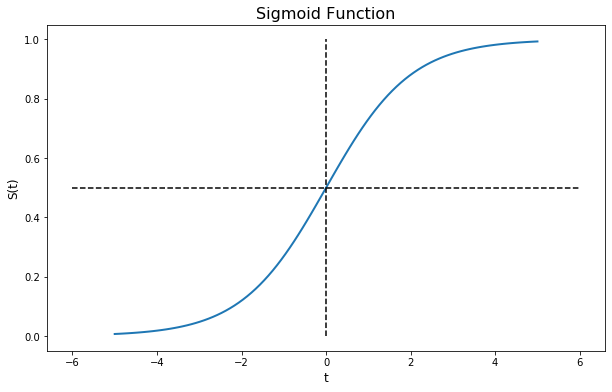

In [51]:
## Plot a sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-5, 5, 100), 1 / ( 1 + np.exp(np.linspace(5, -5, 100))), lw=2)
## Plot a horizontal dashed line
plt.plot([-6, 6], [0.5, 0.5], ls='--', c='k')
## Plot a vertcal dashed line
plt.plot([0, 0], [0, 1], ls='--', c='k')
plt.xlabel('t', size=12)
plt.ylabel('S(t)', size=12)
plt.title('Sigmoid Function', size=16)
plt.show()

**Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression.

- Idea: if we transform the values of the linear function $\beta_0+\beta_1X$ using the Sigmoid function $S(t)$, then no matter what values $\beta_0$, $\beta_1$ or $X$ take, the transformed $y$ will always have values between 0 and 1.

- *Logistic Regression* models use the following equation to estimate the probability that $y = 1$ given its size $X$:

$$
Pr(Y=1|X=x)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$

- Let us use the likelihood function notation,  $p(x_i,\beta_0,\beta_1)=Pr(Y=1|X=x_i)$, 
to represent the probablity of those observed outcomes to be 1 conditioning on $X=x_i$.

Then, given an input X with n independent observations, the following likelihood gives the probability of having the prescribed labels:

$$L(\beta_0, \beta_1) = \prod_{i, y_i=1}p(x_i, \beta_0, \beta_1)\prod_{i, y_i=0}(1-p(x_i, \beta_0, \beta_1))$$


, where the first product is the probability of successfully predicting the “1”s and the second product is the probability of successfully predicting the “0”s in the data.

- The likelihood function $L(\beta_0, \beta_1)$ gives the probability of observing the prescribed classification outcome.

- Among all the possible $\beta_0$, $\beta_1$, it is natural to pick $\beta_0$ and $\beta_1$ maximizing the likelihood $L(\beta_0, \beta_1)$, i.e., to maximize the “agreement” of the selected model with the observed data.


In practice it is often more convenient to work with the logarithm of the likelihood function, called the **log-likelihood**:

$$
\begin{align}
\log{L(\beta_0,\beta_1)} &= \sum_{i=1}^{n}\{y_i\log{p(x_i,\beta_0,\beta_1)+(1-y_i)\log(1-p(x_i,\beta_0,\beta_1))}\}
\\
&= \sum_{i=1}^{n}\{y_i(\beta_0+\beta_1X)-\log(1+e^{\beta_0+\beta_1X})\}
\end{align}
$$

Logistic regression models are usually fitted by maximum (log) likelihood, i.e., to find $\beta_0$ and $\beta_1$ that maximize the function above. 

- Notice that the class labels $y_i$ pair with $\beta_0+\beta_1X$ naturally in the above expression, one thing we would notice in learning SVM, the support vector machine, later.

<p><a name="gradient"></a></p>

### Gradient Descent

To maximize the log-likelihood, most packages, including scikit-learn, use a numerical method called **gradient descent** (or its variant), i.e., to find the function maximum by search along a **steepest path** on the graph of log-likelihood function.


<img src="img/grad_desc.png" style="height: 450px; width: 600px;">

**Classification Based on Probability**

After estimating the parameters, the likelihood function $p(x,\beta_0,\beta_1)$ expresses the probability of output $Y=1$ given x. If we set a threshold on the probability, then we can predict binary output.

Let's use tumor size to determine malignancy:

  - If the maximum likelihood gives $Pr(Y=1|X=x) = 0.2$, then our prediction is $20\%$ chance of tumor being malignant, or equivalently, $80\%$ chance it's benign.
  - If we set the threshold, for example, to be 0.5, then we predict the tumor to be benign.


In [52]:
### We first load the modules and data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
path_to_file = "tumor.csv"
data = pd.read_csv(path_to_file)
x_tm = data[["Size"]]
y_tm = data["Malignant"]
x_tm2 = np.copy(x_tm)
x_tm2[-3, 0] = 13
x_tm2[-1, 0] = 14

- The implementation of logistic regression in scikit-learn can be accessed from class **`LogisticRegression`**.

In [53]:
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()
logit_1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

- Once a **`LogisticRegression`** object is created, the dictionary of the default parameters can be viewed with the `get_params()` method.

The objective functions for logistic regression implemented in `sklearn` are: 
$$min_{w,c}||w||_1+C\sum_{i=1}^n \log{(\exp{(-y_i(X_i^Tw+c))}+1)}$$

and 

$$min_{w,c}\frac{1}{2}w^Tw+C\sum_{i=1}^n \log{(\exp{(-y_i(X_i^Tw+c))}+1)}$$
- where $c$ is the intercet we dnoted by $w_0$. 
- $C$ is the inverse of regularization strenghth. This is opposite to the $\lambda$ we had in Ridge and Lasso, smaller values specify stronger regularization. 
- The first objective function is of $L_1$ and the second is of $L_2$.

In [54]:
logit_1.set_params(C=1e4)
logit_1.fit(x_tm, y_tm)
print([logit_1.coef_, logit_1.intercept_])

[array([[4.50422378]]), array([-16.67929062])]


In [55]:
print(logit_1.score(x_tm, y_tm))

0.8333333333333334


In [56]:
logit_1.predict([[3], [4]])  # the nested list will be converted to 2D np.array automatically

array([0, 1])

- We can access the probability in each class predicted by the logistic regression as well:

In [57]:
logit_1.predict_proba([[3], [4]])

array([[0.9595586 , 0.0404414 ],
       [0.20790427, 0.79209573]])

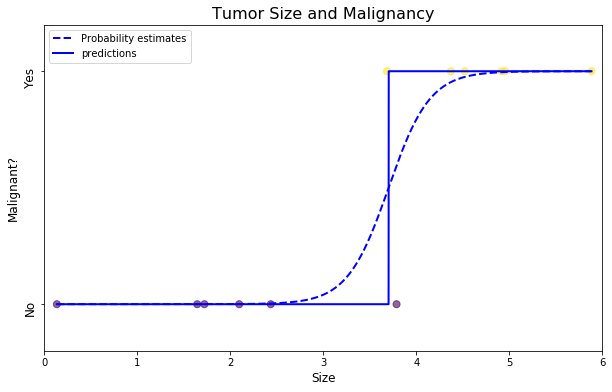

In [58]:
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, \
                   rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
def logistic_model_1Dplot(x, model, c="b"):
    x = np.array(x)
    num = 10000
    x = np.linspace(min(x), max(x), num=num).reshape(num,1)
    ## only plot the probability of prediction to be 1
    plt.plot(x, model.predict_proba(x)[:,1],
             ls='--', lw=2, c=c, label="Probability estimates")
    plt.plot(x, model.predict(x), lw=2, c=c, label="predictions")
    

## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot logistic model with original dataset
logistic_model_1Dplot(x_tm, logit_1)
## Set plot range
plt.axis([0,6,-0.2,1.2])
## Legend top-left corner
plt.legend(loc=2)
plt.show()

- Below we see that the boundary is not affected that much by outliers with logistic regression.

In [59]:
logit_2 = linear_model.LogisticRegression()
logit_2.set_params(C=1e4)
logit_2.fit(x_tm2, y_tm)
print([logit_2.coef_, logit_2.intercept_])

[array([[4.1266289]]), array([-15.28821709])]


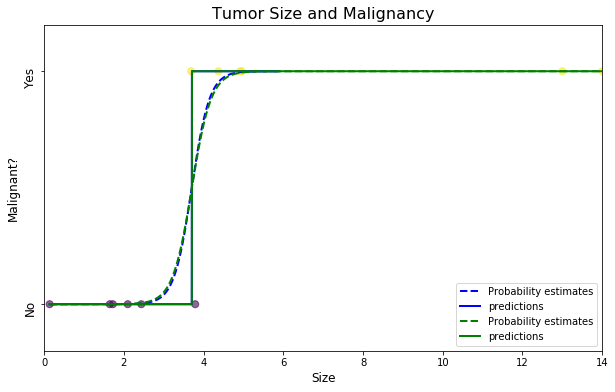

In [60]:
## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm2, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot logistic model with original dataset
logistic_model_1Dplot(x_tm, logit_1)

## Plot logistic model with outlier
logistic_model_1Dplot(x_tm2, logit_2, c='g')   # set the color to green
## Set plot range
plt.axis([0,14,-.2,1.2])
## Legend bottom-right corner
plt.legend(loc=4)
plt.show()

### Logistic Regression with Multiple Variables

When mulitple input variables are involved, we just need to include them in the linear function as we did in multiple linear regression

The matrix form can be written as:

$$Pr(Y=1|\mathbf{X})=\frac{e^{\mathbf{X}\beta}}{1+e^{\mathbf{X}\beta}}$$

You have historical data from the previous student applicants. For each record, you have the applicant’s two exam scores and the admissions decision. Your task is to build a logistic model that estimates an applicant’s probability of admission based on those two exam scores.

- The code below helps to load the data:

In [61]:
path_to_file = "admission.csv"
data = pd.read_csv(path_to_file)
data.head()

,Decision,Test_1,Test_2
0,1,81.0,85.0
1,0,71.0,85.0
2,1,80.0,90.0
3,0,79.0,84.0
4,0,72.0,94.0


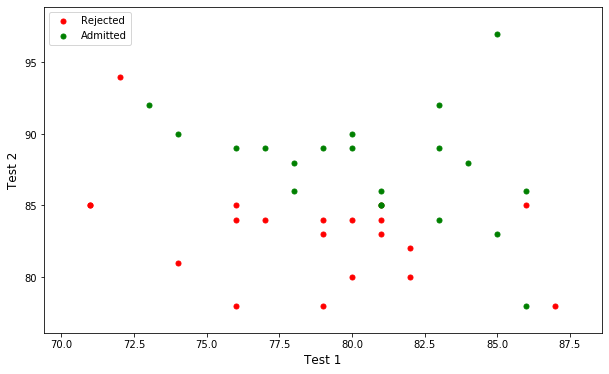

In [62]:
def logistic_model_2Dplot(x, model):
    # import warnings
    # warnings.warn('Does not work for all problems. (Works only for binary label?)')
    
    def plot_y(x_1, model=model):
        ## np.column_stack() combines intercept with coefficents
        for coef in np.column_stack((model.intercept_, model.coef_)):
            ## take b0, b1, b2 for one boundary at a time 
            b_0, b_1, b_2 = coef[:3]
            # given 1, calculate corresponding x2
            # http://python-future.org/compatible_idioms.html
            # Idiomatic Py3, but inefficient on Py2
            yield list(map(lambda x: -(b_0 + b_1*x) / b_2, x_1))
    
    x = np.array(x)
    x_a = [min(x[:,0]), max(x[:,0])]
    col = ["r", "g", "b", "m", "c", "k"]
    for i, x_b in enumerate(plot_y(x_a, model)):
        plt.plot(x_a, x_b, c=col[i])
        
## Data
scores = data[["Test_1", "Test_2"]]
decision = data["Decision"]
## Plotting
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
              legends=["Rejected", "Admitted"], \
              xlabel="Test 1", ylabel="Test 2")
plt.show()

In [63]:
decision_logit = linear_model.LogisticRegression(C=1e4)
decision_logit.fit(scores, decision)
decision_logit.score(scores, decision)

0.875

In [64]:
print(decision_logit.intercept_)
print(decision_logit.coef_)

[-81.40161884]
[[0.41017514 0.57132359]]


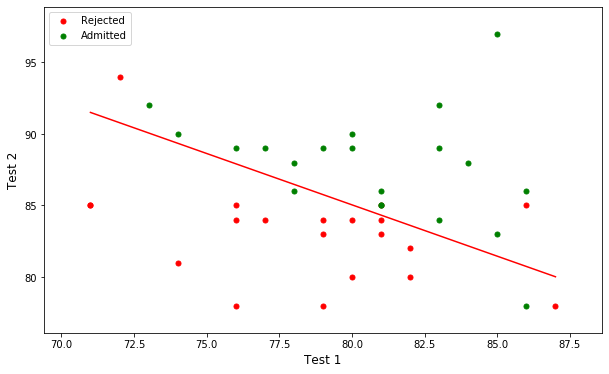

In [65]:
# Plot data points
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
            legends=["Rejected", "Admitted"], \
            xlabel="Test 1", ylabel="Test 2")

# Plot decision boundary
logistic_model_2Dplot(scores, decision_logit)

plt.show()

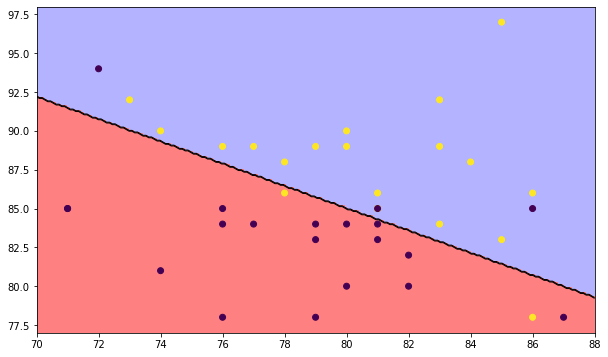

In [66]:
# Plot data points and decision boundary
plt.figure(figsize=(10, 6))
plot_model(
    decision_logit,
    scores.loc[:, 'Test_1'].values.reshape(-1, 1),
    scores.loc[:, 'Test_2'].values.reshape(-1, 1),
    label=decision.values.reshape(-1, 1)
)
plt.show()


### Logistic Regression with More than Two Classes

When the output contains more than two classes, scikit-learn uses a so called “one-vs-rest” setting, i.e., separate binary classifiers are trained for all classes.

We are going to classify the species of the iris flowers according to their numeric features. Since there are three different species, the logistic model will build three classifiers:
- setosa v.s. versicolor & virginica
- versicolor v.s. setosa & virginica
- virginica v.s. setosa & versicolor

We will use only the 3rd and the 4th features (the petal length and the petal width)

In [67]:
from sklearn import datasets
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:,pair]
iris_y = iris.target

In [68]:
iris_logit = linear_model.LogisticRegression(C=1e4)
iris_logit.fit(iris_x, iris_y)
print(iris_logit.score(iris_x, iris_y))
print(iris_logit.coef_)
print(iris_logit.intercept_)

0.96
[[-6.06013048 -8.84637971]
 [ 1.5628654  -3.1526639 ]
 [ 5.62794054 10.30488483]]
[ 21.65529347  -2.8634996  -44.41944351]


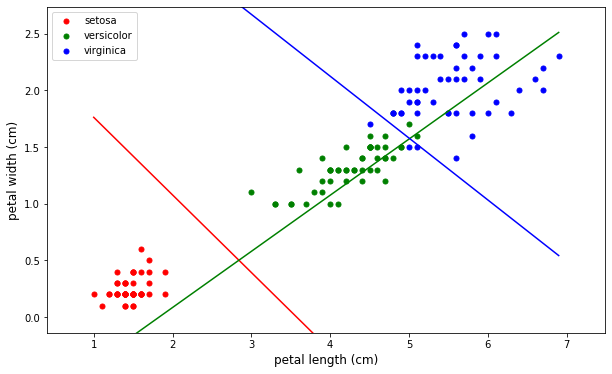

In [69]:
plt.figure(figsize=(10, 6))
data_2Dplot(iris_x, iris_y, xlabel=xlabel, ylabel=ylabel, legends=iris.target_names)
logistic_model_2Dplot(iris_x, iris_logit)
plt.show()

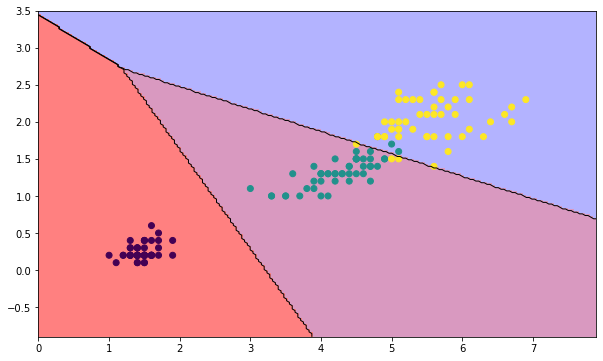

In [70]:
plt.figure(figsize=(10, 6))
plot_model(iris_logit, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [72]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [73]:
knn.fit(iris_x,iris_y)
y_pred=knn.predict(iris_x)
metrics.accuracy_score(iris_y,y_pred)

0.9666666666666667

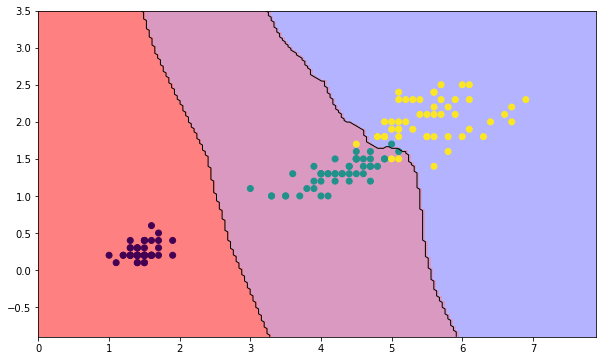

In [74]:
plt.figure(figsize=(10, 6))
plot_model(knn, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

0.9733333333333334


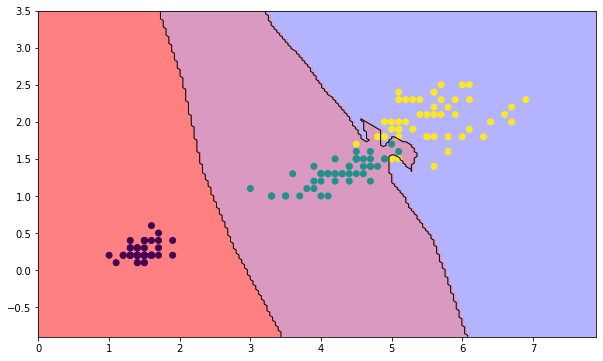

In [75]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(iris_x,iris_y)
y_pred=knn.predict(iris_x)
print(metrics.accuracy_score(iris_y,y_pred))
plt.figure(figsize=(10, 6))
plot_model(knn, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.show()

<p><a name="regularization"></a></p>

## h. Regularization

- Fit a model using a technique that regularizes the coefficient estimates, or equivalently, that shrinks the coefficient estimates towards zero. 

- Shrinking the coefficient estimates can significantly reduce their variances.

- The two best-known techniques of shrinking methods are **ridge regression** and **lasso**.

### Ridge Regression

- Recall that the least squares procedure estimates $\beta$ by minimizing
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2$$

- The **ridge regression** instead estimates $\beta$ by minimizing
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}\beta_j^2$$

where $\lambda \ge 0$ is a *tuning parameter* to be determined.

- By adding the term $\lambda \sum_{j=1}^{k}\beta_j^2$ in the loss function, the estimation will try to shrink the parameters toward 0, hence this term is also called the **shrinkage penalty**. This is also called **L2 penalty**.

- The tuning parameter $\lambda$ is used  to control the relative impact of these two terms on the regression coefficient estimates. 
    - When $\lambda = 0$, the ridge estimate is the same  with the least square estimate. 
    - When $\lambda \to \infty$, all the parameters except $\beta_0$ will be 0, because we do not penalize $\beta_0$ in the loss function. 

- Selecting a good value for $\lambda$ is critical. In practice, we will try a grid of  $\lambda$ values and choose the best one.

### Ridge Regression in Scikit-Learn

If you read the documentation of **Ridge** in python, the objective function implemented is:

$$\min_{\theta}  \parallel X\theta - y \parallel_2^2 + \alpha \parallel \theta \parallel_2^2$$

which is the same as the previous formula, except they used $\theta \text{ and } \alpha \text{ in the place of } \beta \text{ and } \lambda$.

Traininging ridge regresison is similar to linear regression:

In [76]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
# use the first three variables to predict the fourth variable
iris.x = iris.data[:, :3]
iris.y = iris.data[:, 3]

In [77]:
from sklearn import linear_model
ridge = linear_model.Ridge()
ridge.set_params(alpha = 1)
ridge.fit(iris.x, iris.y)
ridge.coef_, ridge.intercept_ # print out the coefficients

(array([-0.17488089,  0.19287784,  0.50658074]), -0.2722016173017128)

Here is an example showing how the coefficients vary as the parameter $\alpha$ increases.

In [78]:
from sklearn import linear_model
ridge = linear_model.Ridge()

- Below we want to train a ridge model for each $\alpha$, we collect the coefficients in the coef list for visualization later. Complete the for loop below.

In [79]:
alpha_100 = np.logspace(-2, 5, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(iris.x, iris.y)
    coef.append(ridge.coef_)

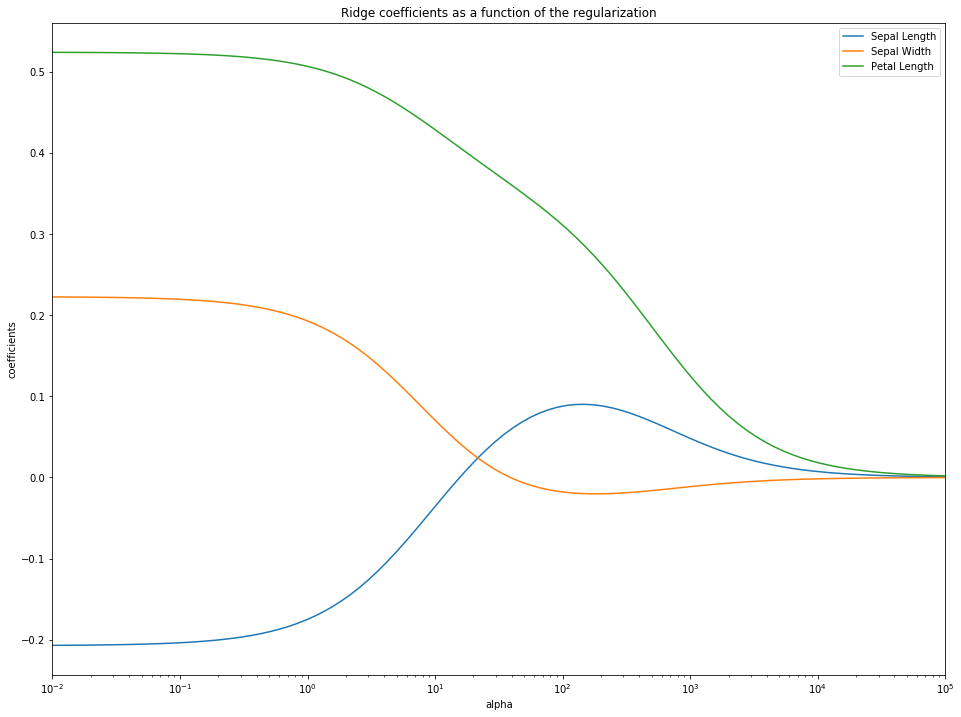

In [80]:
columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

### Lasso

- Similar to ridge regression, **Lasso** also add an extra penalty term in the loss function
- But the penalty term is slightly different from the ridge regression's. The loss function of Lasso is :

$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}|\beta_j|$$

- In Lasso the penalty term $\sum_{j=1}^{k}\beta_j^2$ is replaced by $\sum_{j=1}^{k}|\beta_j|$, this also shrinks the coefficient estimates towards zero. 

- The penalty term Lasso uses is called  **L1 penalty** instead of the **L2 penalty** in ridge regression. 

- However, in the case of the lasso, the L1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $\lambda$ is sufficiently large. 

- Hence the lasso can be used for feature selection. As a result, models generated from the lasso are generally much easier to interpret than those produced by ridge regression.

### Lasso in Scikit-Learn

The objective function of **Lasso** in python is:
$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha | \theta |_1$$
where $n$ refers to the number of observations.

- In lasso the sum of squares of residuals is multiplied by a constant $\frac{1}{2n}$
- The constant does not impact the optimal coefficient
- The parameter $\alpha$ is again used to control the effects of the regularization term.

Implementing `Lasso` is similar to ridge regression:

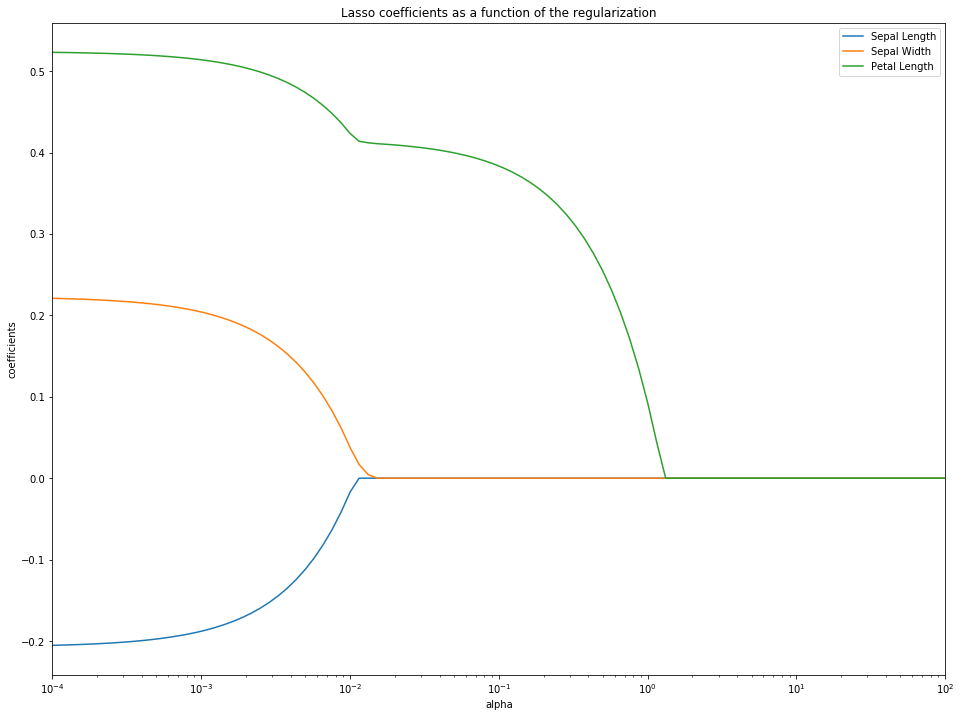

In [81]:
lasso = linear_model.Lasso() 
alphas_lasso = np.logspace(-4, 2, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha = i).fit(iris.x, iris.y)
    coef_lasso.append(lasso.coef_)

columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

![l1vsl2](img/l1vsl2.png)

Comparing the path of ridge with the path of lasso:

- In ridge regression, all the coefficients tend to reach 0 at the same time.
- In lasso, the coefficients tend towards 0 one by one.
- Lasso selects features with th eappropriate penalty.

<img src="http://jamesmccammondotcom.files.wordpress.com/2014/04/screen-shot-2014-04-19-at-11-19-00-pm.png?w=1200" style="width: 300px;">
This picture comes from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

**Which one to use?**

- Neither ridge regression nor lasso will universally dominate the other.

- In general, one might expect lasso to perform better when the response is a function of only a relatively small number of predictors. However, the number of predictors that is related to the response is never known.

- A technique such as cross-validation can be used in order to determine which approach is better on a particular data set.


### ElasticNet

- ElasticNet is a linear regression model that combines L1 with L2 regularization 
- This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 
- ElasticNet is useful when there are multiple features correlated with one another.

### ElasticNet in Scikit-Learn

Here is the objective function of ElasticNet:
$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha \rho | \theta |_1 + \frac{\alpha(1-\rho)}{2} \parallel \theta \parallel_2^2$$
where $n$ refers to the number of observations, and $0 \le \rho \le1$.

- $\alpha$ controls the effects of regularization.
- $\rho$ control the convex combination of L1 and L2. 
    - $\rho = 0$ degenerates back to ridge regression
    - $\rho = 1$ degenerates back to lasso

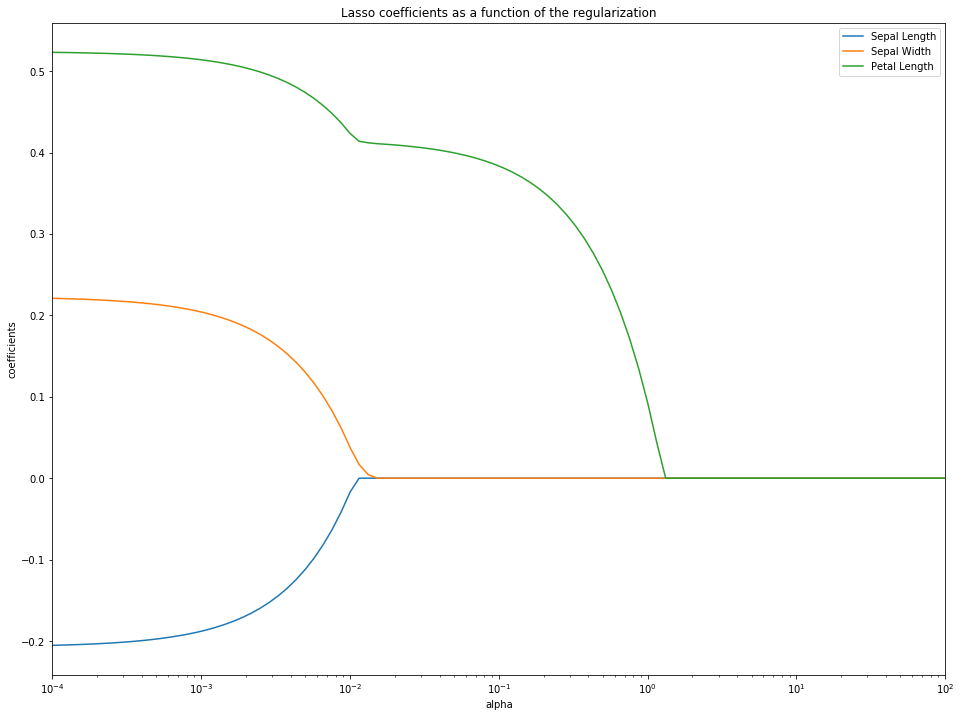

In [82]:
alphas_elastic = np.logspace(-2, 4, 1000)
coef_elastic = []
for i in alphas_elastic:
    elastic = linear_model.ElasticNet(l1_ratio =0.5)
    elastic.set_params(alpha = i)
    elastic.fit(iris.x, iris.y)
    coef_elastic.append(elastic.coef_)

columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

<p><a name="gridsearch"></a></p>

## Grid Search

- Linear regression with regularization was a specific algorithm to speed up the computation. 
- For parameters in the other models, we can only try all the possible values and then choose the best one.
- The grid search provided by **GridSearchCV** exhaustively generates candidates from a grid of parameter values specified.
- The **GridSearchCV** instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

Search the best parameter for **KNN**:

In [83]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
iris = datasets.load_iris()
## set the possible parameters from 3 to 30

grid_param = [{'n_neighbors': range(3, 31)}]
## fit all models
para_search = GridSearchCV(estimator=knn, param_grid=grid_param, scoring='accuracy', cv=5).fit(iris.data, iris.target)

- Fit model on the iris data set.
- In this case, we perform 5-fold cross validation, which is defined by *cv=5*.
- Choose the best parameter by the accuracy of the models.
- The parameter 'n_neighbors' ranges in [3, 4, 5, ..., 30].

The **cv\_results\_** attributes stores scores and many other values from the grid search:

In [85]:
print(list(para_search.cv_results_.keys()))
para_search.cv_results_

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']


{'mean_fit_time': array([0.00040231, 0.00043859, 0.000418  , 0.0003582 , 0.00039883,
        0.0003346 , 0.00029345, 0.00031085, 0.00029883, 0.00028462,
        0.00031204, 0.00028043, 0.00028424, 0.00034046, 0.00029173,
        0.00032907, 0.00027595, 0.00030146, 0.00031652, 0.00031939,
        0.00029097, 0.00027857, 0.00028481, 0.00028739, 0.00029621,
        0.00031061, 0.00031962, 0.0002748 ]),
 'std_fit_time': array([1.99311350e-04, 1.39804361e-04, 7.19802077e-05, 1.02627565e-04,
        1.50913981e-04, 1.20782353e-04, 4.97621099e-05, 4.89290227e-05,
        1.23376489e-05, 1.01291706e-05, 2.50838101e-05, 8.94549559e-06,
        7.38774506e-06, 6.32852916e-05, 5.33248083e-06, 5.39956552e-05,
        5.90315928e-06, 5.70372988e-05, 6.65507530e-05, 6.46142677e-05,
        9.59450396e-06, 6.49374482e-06, 5.54157817e-06, 1.70908708e-05,
        2.50498857e-05, 4.77183693e-05, 5.41334306e-05, 2.81764364e-05]),
 'mean_score_time': array([0.00180664, 0.00272284, 0.00174685, 0.00218925, 

- **best\_score\_**: Score of best_estimator on the hold out data.
- **best\_params\_**: Parameter setting that gave the best results on the hold out data.

In [86]:
print(para_search.best_score_)
print(para_search.best_params_)

0.98
{'n_neighbors': 6}


The best parameter here is 6, and the corresponding accuracy is 98%.
- At last, we implement KNN with the best parameter on the whole data set.
- **best\_estimator\_** : Estimator that was chosen by the search, i.e. estimator which gave highest score on the hold out data.

In [87]:
para_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [88]:
knn_best = para_search.best_estimator_
knn_best.fit(iris.data, iris.target)
knn_best.score(iris.data, iris.target)

0.9733333333333334

Here is a more complicated case:
- Set the 'weights' parameter to be 'uniform' or 'distance'.
- Set the parameter 'n_neighbors' to be 3 to 30.
- Set 'p' may equals to 1 or 2.

**GridSearchCV** will fit all the possible combinations of the parameters, and choose the best model by the accuracy with 5-fold cross-validation.

In [89]:
grid_param2 = [{'weights': ['uniform', 'distance'], 'n_neighbors': range(3, 31), 'p': [1, 2]}]
para_search2 = GridSearchCV(knn, grid_param2, scoring='accuracy', cv=5)
para_search2.fit(iris.data, iris.target)
para_search2.cv_results_

{'mean_fit_time': array([0.00046258, 0.00030522, 0.00053725, 0.00060773, 0.0005908 ,
        0.0004456 , 0.00091138, 0.00037518, 0.00031862, 0.00027399,
        0.00026221, 0.00028343, 0.00028315, 0.00029016, 0.00028062,
        0.00031023, 0.00029697, 0.00032649, 0.0002985 , 0.0002872 ,
        0.0002882 , 0.00031204, 0.00029025, 0.00027099, 0.00025959,
        0.00026164, 0.00026608, 0.00026116, 0.00029173, 0.00026002,
        0.00026298, 0.00030417, 0.00028524, 0.0004694 , 0.0002769 ,
        0.0002737 , 0.00026984, 0.00025954, 0.00025787, 0.000278  ,
        0.00029922, 0.00030317, 0.00030308, 0.00026579, 0.00034466,
        0.00025787, 0.00027518, 0.00035753, 0.00025501, 0.00025668,
        0.00030608, 0.00030236, 0.00029812, 0.00025983, 0.00026069,
        0.00026097, 0.00032578, 0.00029411, 0.00033083, 0.00026522,
        0.00027413, 0.00027962, 0.00033312, 0.00028014, 0.00027046,
        0.00026069, 0.00025654, 0.00026836, 0.00030375, 0.00025797,
        0.00026212, 0.0003139 ,

In [90]:
print(para_search2.best_params_)
print(para_search2.best_score_)

{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.9866666666666667


This time the best model is a weighted KNN with 10 neighbors and euclidean distance.

Try to use cross validation and grid search to fit a better KNN model on the Digit Recognizer Compitition.

## Validation Curves
- Grid search is the appropriate way to optimize multiple hyperparameters simultaneously 
- Validation curves do not replace grid search, but they can show the influence of any one hyperparameter on the model fit

Show the validation curve of the number of neighbors for **KNN**:

In [91]:
from sklearn.model_selection import validation_curve
param_range = range(3, 31)
kwargs = dict(param_name='n_neighbors', param_range=param_range)
train_scores, test_scores = validation_curve(knn, iris.data, iris.target, **kwargs)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

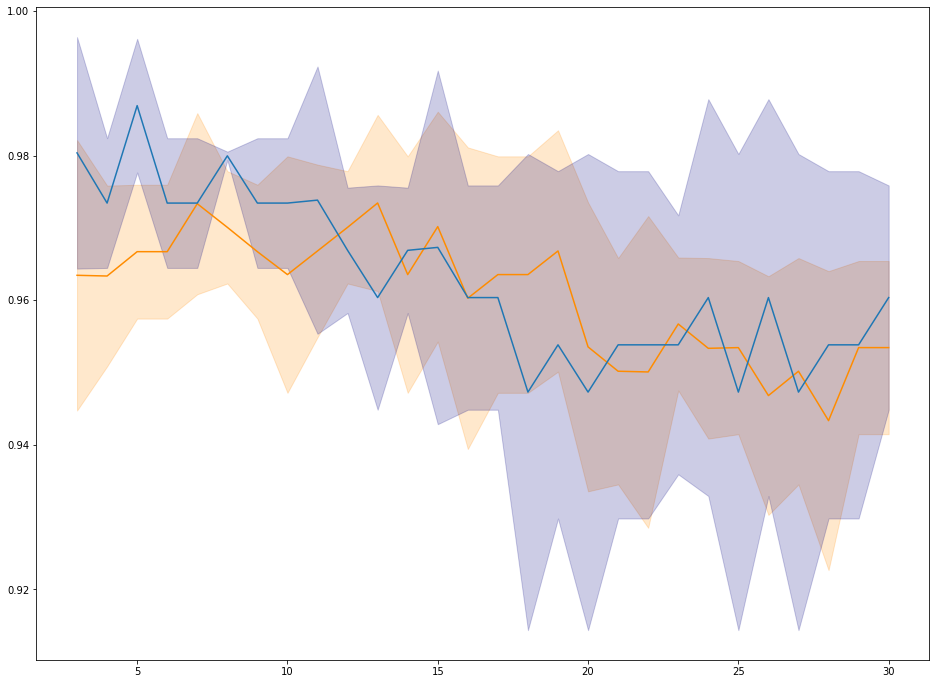

In [92]:
# Train mean and standard deviation
train_color = "darkorange"
plt.plot(param_range, train_scores_mean, color=train_color)
train_y1 = train_scores_mean - train_scores_std
train_y2 = train_scores_mean + train_scores_std
plt.fill_between(param_range, y1=train_y1, y2=train_y2, color=train_color, alpha=0.2)

# Test mean and standard deviation
test_color = "navy"
plt.plot(param_range, test_scores_mean)
test_y1 = test_scores_mean - test_scores_std
test_y2 = test_scores_mean + test_scores_std
plt.fill_between(param_range, y1=test_y1, y2=test_y2, color=test_color, alpha=0.2)
plt.show()